<a href="https://colab.research.google.com/github/satesilka/IMLO-Open-Assessment/blob/main/IMLO_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
## Imports
"""
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

from sklearn import datasets

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


In [2]:
"""
## Load Flowera102 training and test datasets
"""
data_path = "data"

flowers_train_data = datasets.Flowers102(
    root=data_path,
    split='train',
    download=True,
    transform=ToTensor()
)

flowers_test_data = datasets.Flowers102(
    root=data_path,
    split='test',
    download=True,
    transform=ToTensor()
)



100%|██████████| 344862509/344862509 [00:16<00:00, 21172795.72it/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 271963.40it/s]


100%|██████████| 14989/14989 [00:00<00:00, 5817918.07it/s]


6149

Number of classes: 102
Number of training samples: 1020
Sample image shape: torch.Size([3, 500, 754])
Sample label: 0


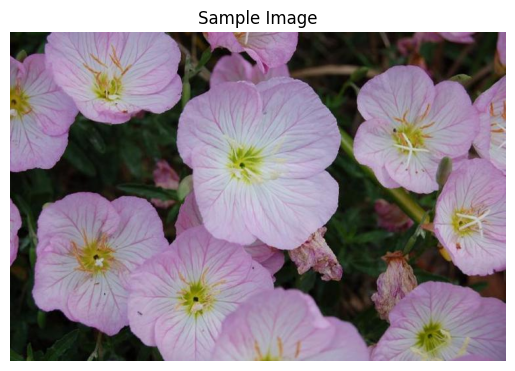

In [5]:
# Get unique labels from the dataset
unique_labels = set()
for sample in flowers_train_data:
    label = sample[1]
    unique_labels.add(label)

# Determine the number of classes
num_classes = len(unique_labels)
print("Number of classes:", num_classes)


# Check the size of each split
num_train_samples = len(flowers_train_data)
print("Number of training samples:", num_train_samples)

# Inspect a sample image and label
sample_image, sample_label = flowers_train_data[0]
print("Sample image shape:", sample_image.shape)
print("Sample label:", sample_label)

# Visualize the sample image
plt.imshow(sample_image.permute(1, 2, 0))  # Permute dimensions for visualization (C, H, W) -> (H, W, C)
plt.title("Sample Image")
plt.axis('off')
plt.show()

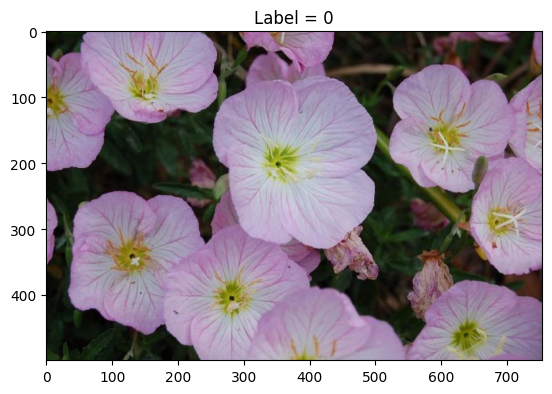

In [6]:
def imshow(sample_element):
    image = sample_element[0]  # Get the image tensor
    label = sample_element[1]  # Get the label

    # Convert the tensor to numpy array and plot
    if image.shape[0] == 1:
        # Grayscale image (single channel)
        plt.imshow(image.squeeze().numpy(), cmap='gray')
    else:
        # RGB image (three channels)
        plt.imshow(image.numpy().transpose(1, 2, 0))

    plt.title('Label = ' + str(label))
    plt.show()

# Visualizing a sample image from the training dataset
imshow(flowers_train_data[0])


In [7]:
class_to_idx = {}  # Dictionary to store class indices
for sample_idx, (image, label) in enumerate(flowers_train_data):
    if label not in class_to_idx:
        class_to_idx[label] = []
    class_to_idx[label].append(sample_idx)

# Convert indices to class names
idx_to_class = {idx: label for label, indices in class_to_idx.items() for idx in indices}

# Print class-to-index mapping
print("Class to index mapping:")
print(class_to_idx)

# Print index-to-class mapping
print("\nIndex to class mapping:")
print(idx_to_class)


Class to index mapping:
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 3: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 4: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 5: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 6: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 7: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 8: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 9: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 10: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 11: [110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 12: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 13: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 14: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 15: [150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 20: [160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 16: [170, 171, 172, 173, 174, 175, 176, 177, 178, 179], 17: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189], 18: [190, 191, 192, 193, 194, 1

In [8]:
# Dictionary to store class indices
class_to_idx = {}

# Iterate over the dataset to build the mapping
for sample_idx, (image, label) in enumerate(flowers_train_data):
    if label not in class_to_idx:
        class_to_idx[label] = []
    class_to_idx[label].append(sample_idx)

# Convert indices to class names
idx_to_class = {idx: label for label, indices in class_to_idx.items() for idx in indices}

# Print class-to-index mapping
print("Class to index mapping:")
print(class_to_idx)

# Print index-to-class mapping
print("\nIndex to class mapping:")
print(idx_to_class)


Class to index mapping:
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 3: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 4: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 5: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 6: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 7: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 8: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 9: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 10: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 11: [110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 12: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 13: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 14: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 15: [150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 20: [160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 16: [170, 171, 172, 173, 174, 175, 176, 177, 178, 179], 17: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189], 18: [190, 191, 192, 193, 194, 1

In [9]:
# Initialize an empty list to store class names
class_names = []

# Iterate over the class_to_idx dictionary and collect class names
for label, indices in class_to_idx.items():
    class_names.append(idx_to_class[indices[0]])  # Get the class name using the first index of each class

# Print the list of class names
print("Class Names:", class_names)


Class Names: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


In [10]:
print(dir(flowers_train_data))

['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_base_folder', '_check_integrity', '_download_url_prefix', '_file_dict', '_format_transform_repr', '_image_files', '_images_folder', '_is_protocol', '_labels', '_repr_indent', '_split', '_splits_map', 'download', 'extra_repr', 'root', 'target_transform', 'transform', 'transforms']


In [11]:
help(flowers_train_data)

Help on Flowers102 in module torchvision.datasets.flowers102 object:

class Flowers102(torchvision.datasets.vision.VisionDataset)
 |  Flowers102(root: str, split: str = 'train', transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `Oxford 102 Flower <https://www.robots.ox.ac.uk/~vgg/data/flowers/102/>`_ Dataset.
 |  
 |  .. warning::
 |  
 |      This class needs `scipy <https://docs.scipy.org/doc/>`_ to load target files from `.mat` format.
 |  
 |  Oxford 102 Flower is an image classification dataset consisting of 102 flower categories. The
 |  flowers were chosen to be flowers commonly occurring in the United Kingdom. Each class consists of
 |  between 40 and 258 images.
 |  
 |  The images have large scale, pose and light variations. In addition, there are categories that
 |  have large variations within the category, and several very similar categories.
 |  
 |  Args:
 |      root (string): Root directory of th

In [12]:
# Accessing attributes of flowers_train_data dataset object
labels = flowers_train_data._labels
root_directory = flowers_train_data.root
transformations = flowers_train_data.transform
target_transformations = flowers_train_data.target_transform
needs_download = flowers_train_data.download


In [13]:
class CNN(nn.Module):
  def __init__(self, input_size, hidden_layers, output_size, activation_function=F.relu):
    super(CNN, self).__init__()
    if len(hidden_layers) < 1:
      raise ValueError("Neural network must have at least 1 hidden layer")

    self.layers = nn.ModuleList()
    self.layers.append(nn.Linear(input_size, hidden_layers[0]))
    for i in range(1, len(hidden_layers)):
      self.layers.append(nn.Linear(hidden_layers[i - 1], hidden_layers[i]))


    self.out = nn.Linear(hidden_layers[-1], output_size)
    self.activation_function = activation_function

  def forward(self, x):
    for layer in self.layers:
      x = self.activation_function(layer(x))
    x = self.out(x)
    return x



Instantiate the Model

In [ ]:
model = CNN()

Defining the Loss Function

In [ ]:
criterion = nn.CrossEntropyLoss()

Define Optimiser

In [14]:
optimizer = torch.optim.SGD(model.patameters(), lr=0.01)

NameError: name 'model' is not defined

Training Loop

In [ ]:
for epoch in range(num_epochs):
  model.train()
  for batch_idx, (data, target) in enumerate(flowers_train_data):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx, (data, target) in enumerate(train_loader):
      optimizer.zero_grad()
      butput = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % log_interval == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(flowers_train_data.dataset), 100. * batch_idx / len(flowers_train_data), loss.item()))

Evaluation

In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in flowers_test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(flowers_test_data.dataset)
accuracy = 100. * correct / len(flowers_test_data.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(flowers_test_data.dataset), accuracy))
